In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
import matplotlib
import pylab
from matplotlib import transforms, pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import scipy.stats as stats
#
# %matplotlib inline

In [2]:
# Построение плотности распределения
def draw_kde(col1, col2, col3, df1, df2, label1, label2):
    #fig, (ax11, ax12, ax21, ax22) = plt.subplots(
    #    ncols=4, figsize=(20, 15))
    # первый первый график
    pylab.figure(figsize=(20, 15))
    pylab.subplot(2, 2, 1)
    pylab.title("'"+col2+"' "+label1)
    pylab.plot(df1[col1], df1[col2])
    # первый второй график
    pylab.subplot(2, 2, 2)
    pylab.title("'"+col2+"' "+label2)
    pylab.plot(df2[col1], df2[col2])
    # второй первый график
    pylab.subplot(2, 2, 3)
    pylab.title("'"+col3+"' "+label1)
    pylab.plot(df1[col1], df1[col3])
    # второй второй график
    pylab.subplot(2, 2, 4)
    pylab.title("'"+col3+"' "+label2)
    pylab.plot(df2[col1], df2[col3])
    
    pylab.show()

# Загрузка данных

In [3]:
data = pd.read_csv('./books.csv', sep=',', encoding="utf-8")
data.head(1)

,BookID,Title,Authors,Average_rating,ISBN,ISBN13,Language_code,Num_pages,Ratings_count,Text_reviews_count,Publication_date,Publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.


In [4]:
data = data.reset_index(drop=True)
enc = OrdinalEncoder(categories='auto', dtype=int)
data[["BookID"]] = enc.fit_transform(data[["BookID"]])
row_date_data = data["Publication_date"]
date_data = row_date_data.str.split('/',expand=True)
date_data.columns = ["Publication_month", "Publication_day", "Publication_year"]
date_data = date_data[["Publication_month", "Publication_year"]]
date_data.head(1)
data["Publication_month"] = pd.to_numeric(date_data["Publication_month"])
data["Publication_year"] = pd.to_numeric(date_data["Publication_year"])
data = data.drop(columns="ISBN")
data = data.drop(columns="ISBN13") # удалю признаки номера
data = data.drop(columns="Title")
data = data.drop(columns="Authors")
data = data.drop(columns="Language_code")
data = data.drop(columns="Publication_date")
data = data.drop(columns="Publisher")
data.head(1)

,BookID,Average_rating,Num_pages,Ratings_count,Text_reviews_count,Publication_month,Publication_year
0,0,4.57,652,2095690,27591,9,2006


In [5]:
# DataFrame не содержащий целевой признак Average_rating
X_ALL = data.drop(['Average_rating'], axis=1)
X = X_ALL.drop(['BookID'], axis=1)

In [6]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [7]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Average_rating'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((8898, 6), (2225, 6))

# Масштабирование признаков

## 1) Масштабирование данных на основе Z-оценки
### x′=(x−μ(x))/σ(x)
### где x - признак, μ(x)=mean(x) - среднее значение, σ(x)=std(x) - среднеквадратичное отклонение.

In [8]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled = arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled.head(1)

,BookID,Num_pages,Ratings_count,Text_reviews_count,Publication_month,Publication_year
0,-1.731895,1.308751,18.469833,10.498316,0.7183,0.707055


In [9]:
X_ALL.head(1)

,BookID,Num_pages,Ratings_count,Text_reviews_count,Publication_month,Publication_year
0,0,652,2095690,27591,9,2006


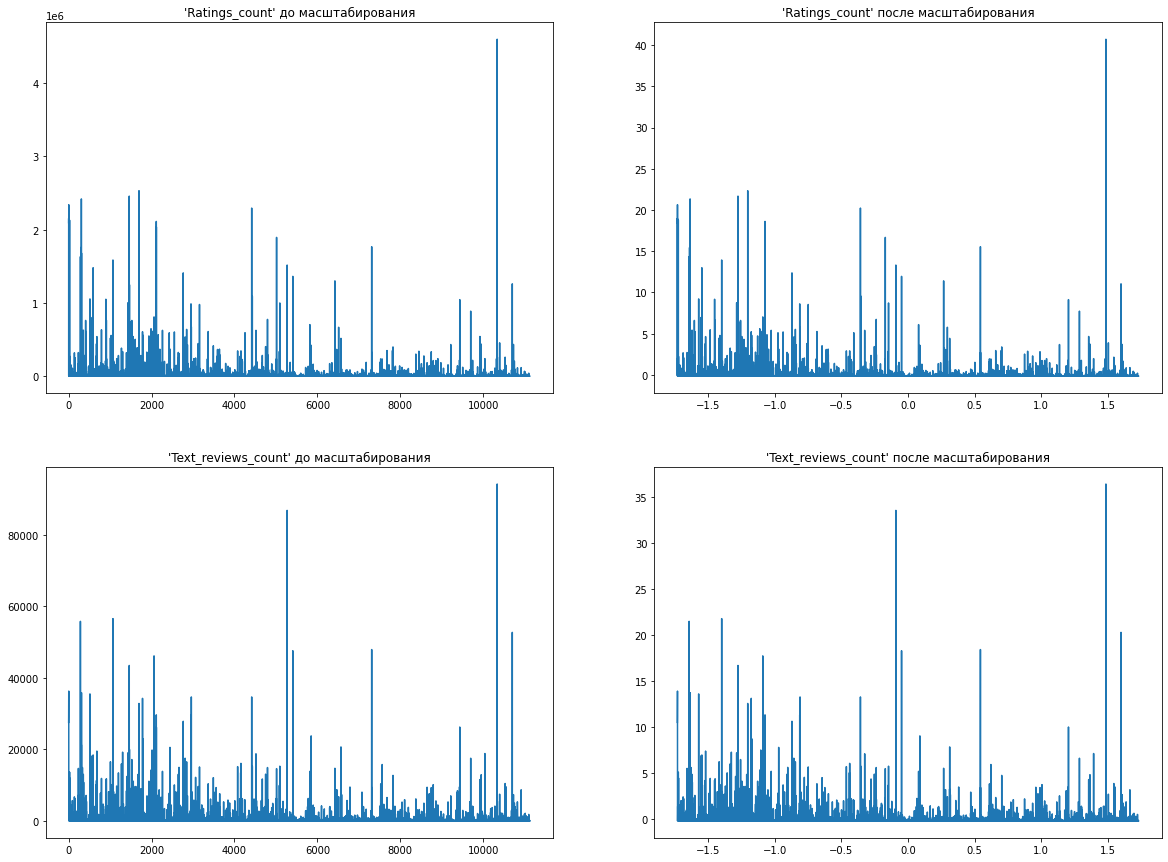

In [10]:
draw_kde('BookID', 'Ratings_count', 'Text_reviews_count', data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [11]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
data_cs12_scaled_train_temp = cs12.fit_transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)
data_cs12_scaled_train.head(1)

,BookID,Num_pages,Ratings_count,Text_reviews_count,Publication_month,Publication_year
0,-1.706944,0.090988,-0.151827,-0.196983,1.00754,-0.743376


In [12]:
X_train.head(1)

,BookID,Num_pages,Ratings_count,Text_reviews_count,Publication_month,Publication_year
106,106,360,1035,23,10,1994


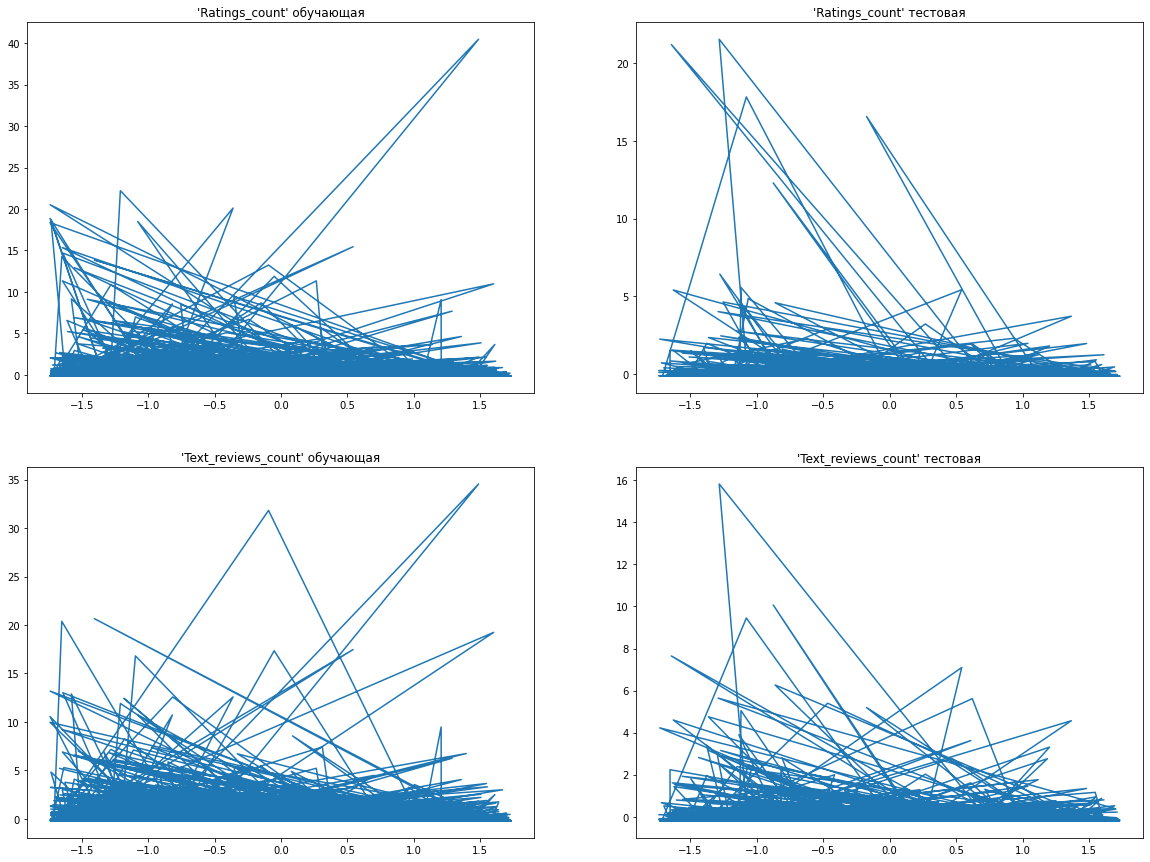

In [13]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde('BookID', 'Ratings_count', 'Text_reviews_count', data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

## 2) MinMax-масштабирование
### X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
### X_scaled = X_std * (max - min) + min

In [14]:
sc2 = MinMaxScaler()
sc2_data = sc2.fit_transform(data[['Ratings_count']])

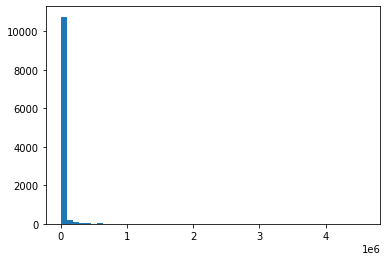

In [15]:
plt.hist(data['Ratings_count'], 50)
plt.show()

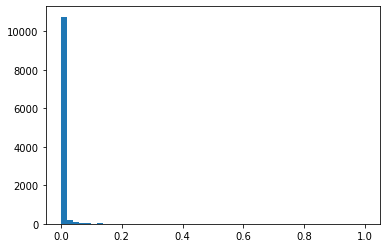

In [16]:
plt.hist(sc2_data, 50)
plt.show()

## 3) Нормализация данных
### Нормировка данных:
### l1 (сумма по каждой строке = 1)
### l2 (дисперсия 1 = 0, мат.ож = 0 - по-умолчанию)

In [17]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Ratings_count']])

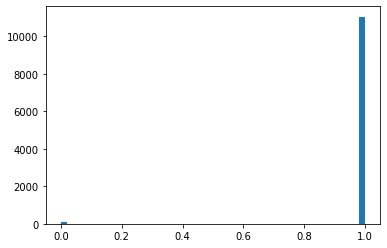

In [18]:
plt.hist(sc3_data, 50)
plt.show()

# Обработка выбросов
## Подготовка

In [19]:
x_col_list = list(X.columns)
x_assim_cols = ['Ratings_count', 'Text_reviews_count']
x_sim_cols = ['Num_pages', 'Publication_month', 'Publication_year']
x_col_list

['Num_pages',
 'Ratings_count',
 'Text_reviews_count',
 'Publication_month',
 'Publication_year']

In [20]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

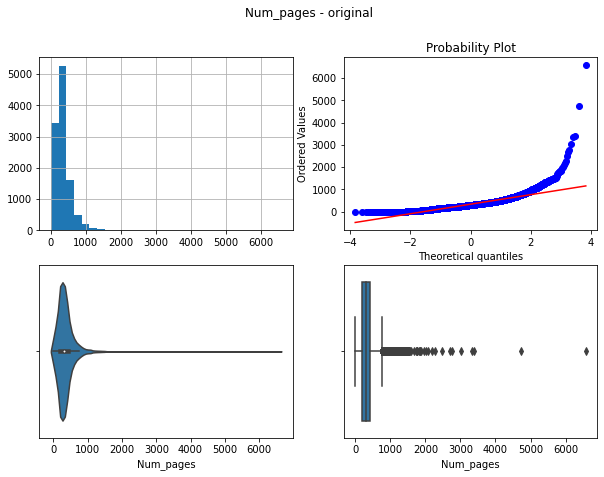

In [21]:
diagnostic_plots(data, 'Num_pages', 'Num_pages - original')

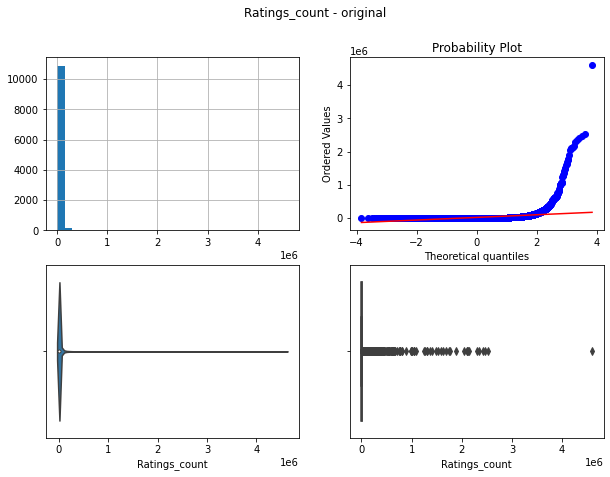

In [22]:
diagnostic_plots(data, 'Ratings_count', 'Ratings_count - original')

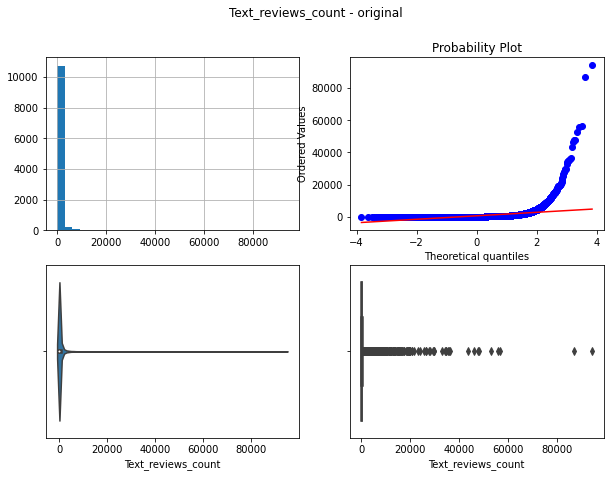

In [23]:
diagnostic_plots(data, 'Text_reviews_count', 'Text_reviews_count - original')

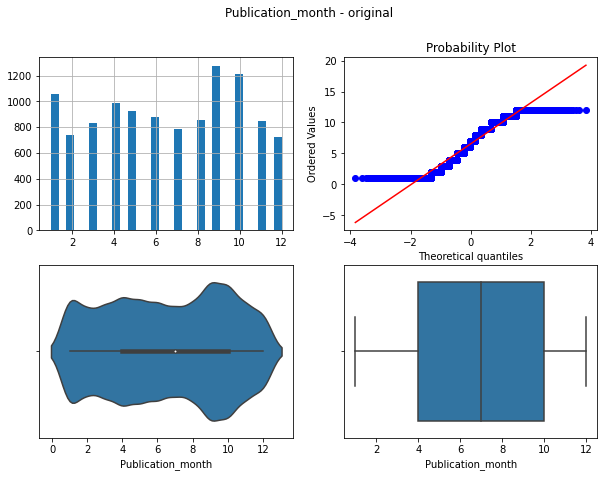

In [24]:
diagnostic_plots(data, 'Publication_month', 'Publication_month - original')

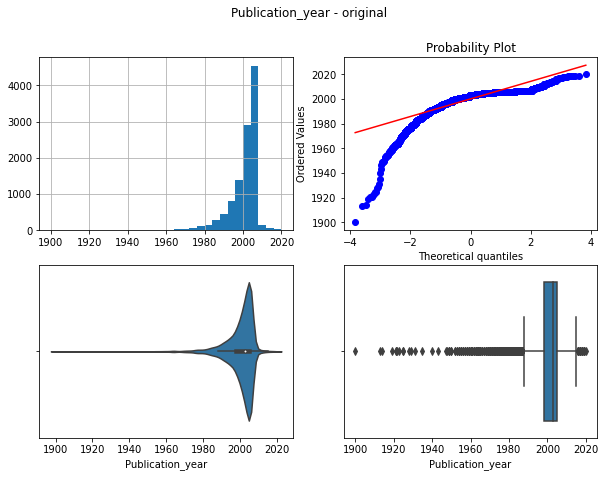

In [25]:
diagnostic_plots(data, 'Publication_year', 'Publication_year - original')

In [26]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [27]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary    

## Удаление выбросов
### Использование межквартильного размаха

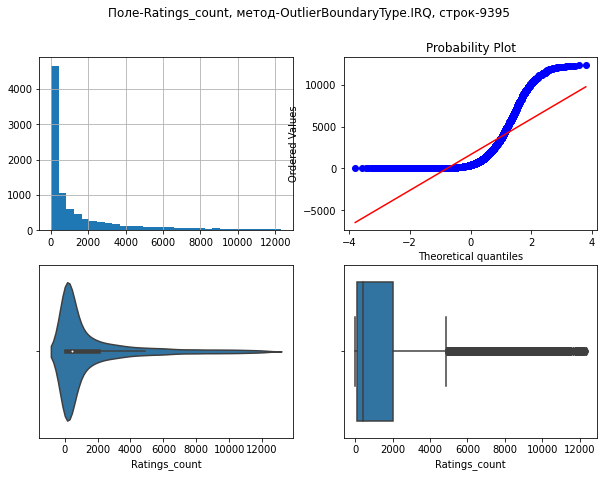

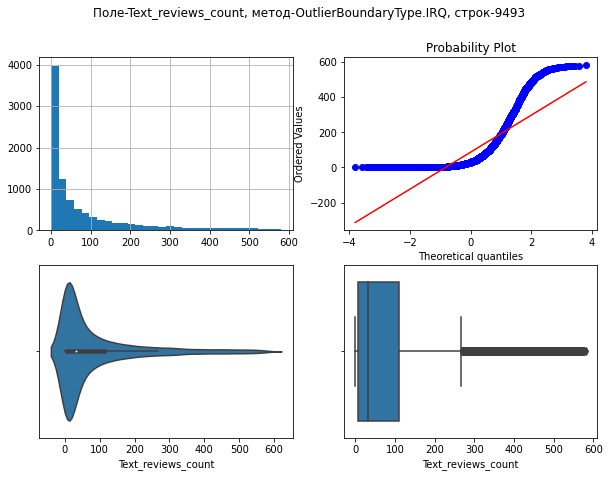

In [28]:
for col in x_assim_cols:
    obt = OutlierBoundaryType.IRQ
    # Вычисление верхней и нижней границы
    lower_boundary, upper_boundary = get_outlier_boundaries(X, col, obt)
    # Флаги для удаления выбросов
    outliers_temp = np.where(X[col] > upper_boundary, True, 
                             np.where(X[col] < lower_boundary, True, False))
    # Удаление данных на основе флага
    data_trimmed = X.loc[~(outliers_temp), ]
    title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
    diagnostic_plots(data_trimmed, col, title)

### Использование 5% и 95% квантилей

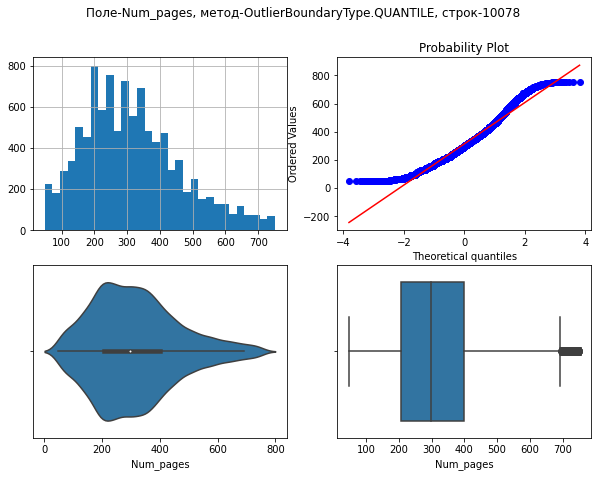

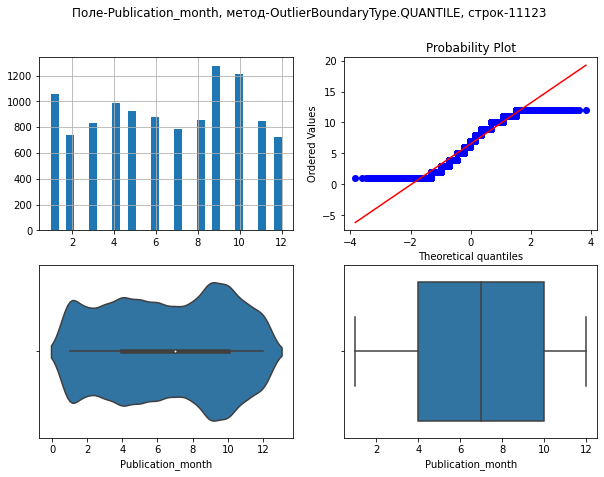

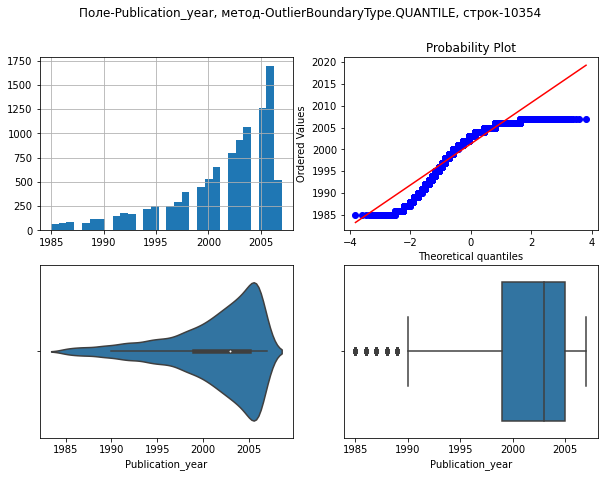

In [29]:
for col in x_sim_cols:
    obt = OutlierBoundaryType.QUANTILE
    # Вычисление верхней и нижней границы
    lower_boundary, upper_boundary = get_outlier_boundaries(X, col, obt)
    # Флаги для удаления выбросов
    outliers_temp = np.where(X[col] > upper_boundary, True, 
                             np.where(X[col] < lower_boundary, True, False))
    # Удаление данных на основе флага
    data_trimmed = X.loc[~(outliers_temp), ]
    title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
    diagnostic_plots(data_trimmed, col, title)

## Замена выбросов
### Для замены использую найденные верхнюю и нижнюю границы

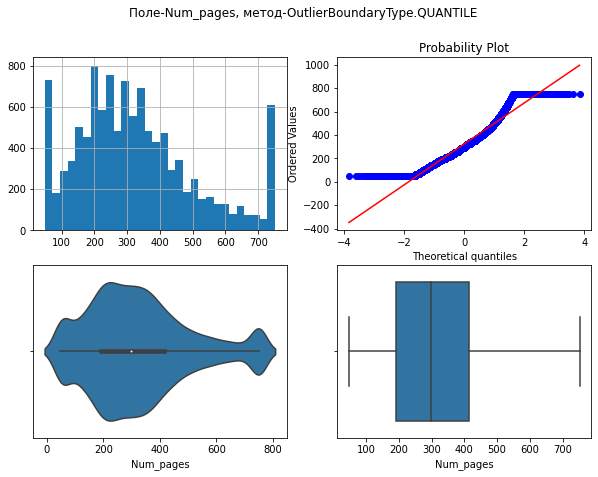

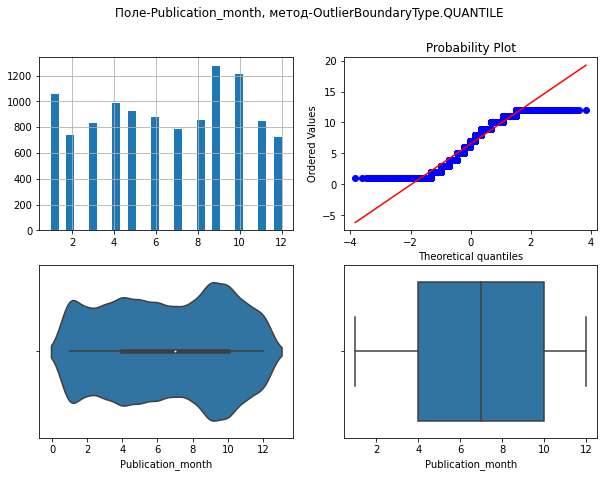

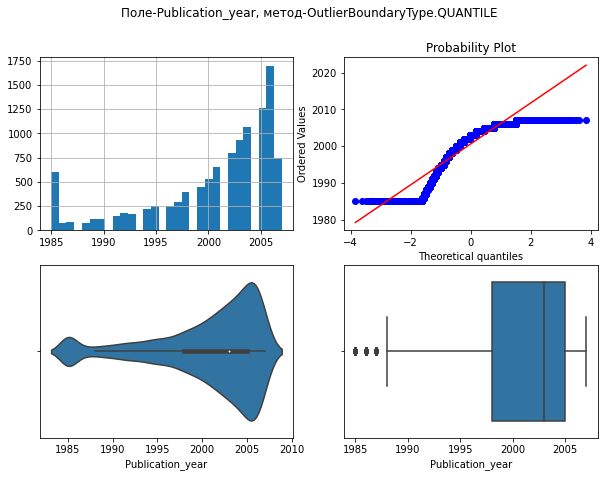

In [30]:
for col in x_sim_cols:
    obt = OutlierBoundaryType.QUANTILE
    # Вычисление верхней и нижней границы
    lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
    # Изменение данных
    data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                             np.where(data[col] < lower_boundary, lower_boundary, data[col]))
    title = 'Поле-{}, метод-{}'.format(col, obt)
    diagnostic_plots(data, col, title)

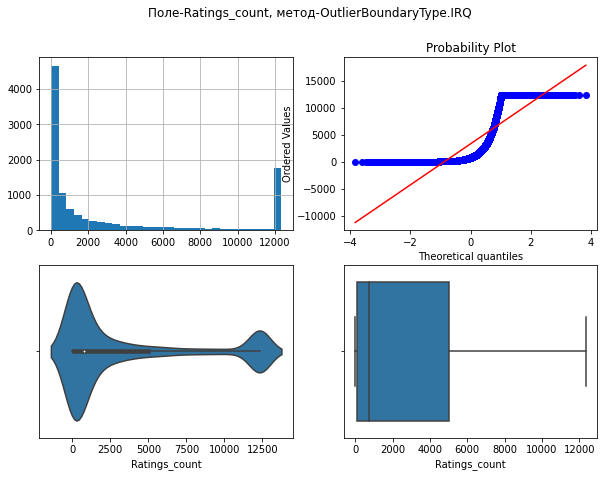

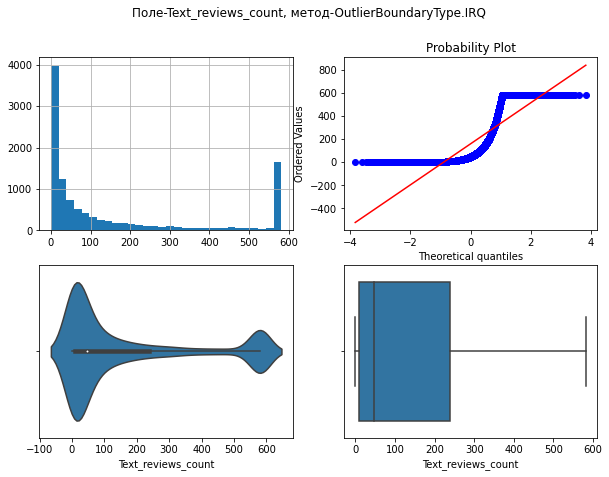

In [31]:
for col in x_assim_cols:
    obt = OutlierBoundaryType.IRQ
    # Вычисление верхней и нижней границы
    lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
    # Изменение данных
    data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                             np.where(data[col] < lower_boundary, lower_boundary, data[col]))
    title = 'Поле-{}, метод-{}'.format(col, obt)
    diagnostic_plots(data, col, title)

## Отбор признаков
### Фильтрация

#### Удаление константных и псевдоконстантных (почти константных) признаков

In [32]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.15)
selector.fit(X)
# Значения дисперсий для каждого признака - великолепные признаки
selector.variances_

array([5.81493609e+04, 1.26549217e+10, 6.63837164e+06, 1.16539834e+01,
       6.80106306e+01])

#### Методы, основанные на корреляции

<AxesSubplot:>

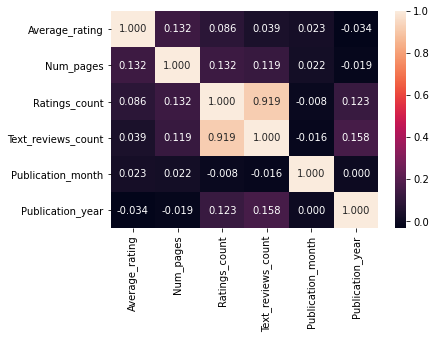

In [33]:
# DataFrame не содержащий целевой признак Average_rating
X_y = data.drop(['BookID'], axis=1)
sns.heatmap(X_y.corr(), annot=True, fmt='.3f')

In [34]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [35]:
make_corr_df(X_y)

,f1,f2,corr
0,Text_reviews_count,Ratings_count,0.918776
1,Ratings_count,Text_reviews_count,0.918776


In [36]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [37]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['Ratings_count', 'Text_reviews_count']]

### Обёртывание
#### Алгоритмы полного перебора

In [43]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
y = data[['Average_rating']]

In [46]:
#efs1 = EFS(knn, 
#           min_features=2,
#           max_features=4,
#           scoring='accuracy',
#           print_progress=True,
#           cv=5).fit(X, y)

#efs1 = efs1.fit(X, y)

#print('Best accuracy score: %.2f' % efs1.best_score_)
#print('Best subset (indices):', efs1.best_idx_)
#print('Best subset (corresponding names):', efs1.best_feature_names_)

### Вложения
#### Использование линейных моделей - линейная регрессия

In [48]:
from sklearn.linear_model import Lasso

# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(X, y)
# Коэффициенты регрессии
list(zip(X.columns, e_ls1.coef_))

[('Num_pages', 0.00019983125858207552),
 ('Ratings_count', 1.042960037715289e-07),
 ('Text_reviews_count', -0.0),
 ('Publication_month', 0.0),
 ('Publication_year', -0.0)]

In [50]:
from sklearn.feature_selection import SelectFromModel

sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(X, y)
list(zip(X.columns, sel_e_ls1.get_support()))

[('Num_pages', True),
 ('Ratings_count', False),
 ('Text_reviews_count', False),
 ('Publication_month', False),
 ('Publication_year', False)]